In [1]:
import pandas as pd

In [77]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [78]:
import xgboost as xgb

In [81]:
from sklearn.model_selection import train_test_split

In [83]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [85]:
data = pd.read_csv('/Users/jd/Desktop/cardio_train.csv', sep=';')

In [87]:
print(data.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [89]:
print(data.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [91]:
X = data.drop(columns=['cardio'])
y = data['cardio']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [97]:
import xgboost as xgb

model = xgb.XGBClassifier(eval_metric="logloss")  # Ensure correct initialization
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [99]:
y_pred = model.predict(X_test)

In [101]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [105]:
print(confusion_matrix(y_test, y_pred))

[[5370 1618]
 [2118 4894]]


In [107]:
print(model.feature_importances_)

[0.02357813 0.05803825 0.02555947 0.02338711 0.02891587 0.4517648
 0.03295688 0.18610899 0.03649561 0.0462536  0.04603211 0.04090913]


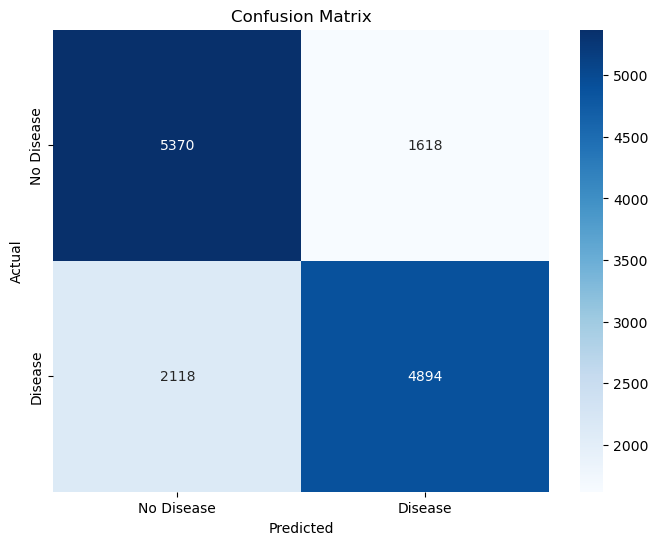

In [109]:
# Visualizes the confusion matrix to show the true positives, true negatives, false positives, and false negatives.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have y_test and y_pred
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<Figure size 1000x600 with 0 Axes>

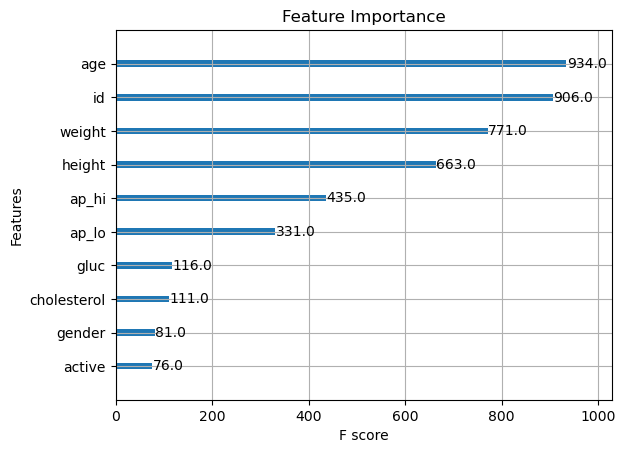

In [113]:
#Displays the importance of each feature used by the XGBoost model.
#Helps identify which features contribute the most to the model's predictions.

plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.show()

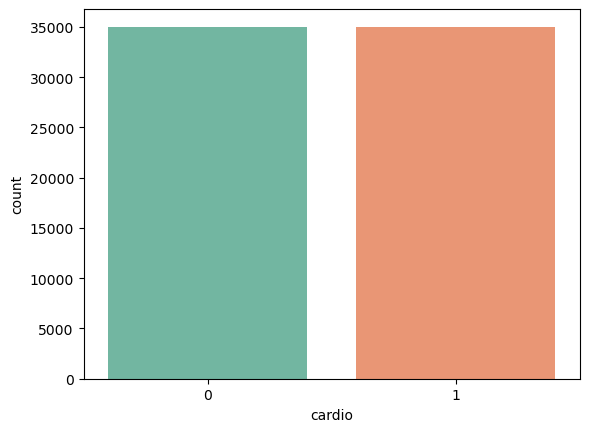

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
sns.countplot(x='cardio', data=data, hue='cardio', palette='Set2', legend=False)

plt.show()


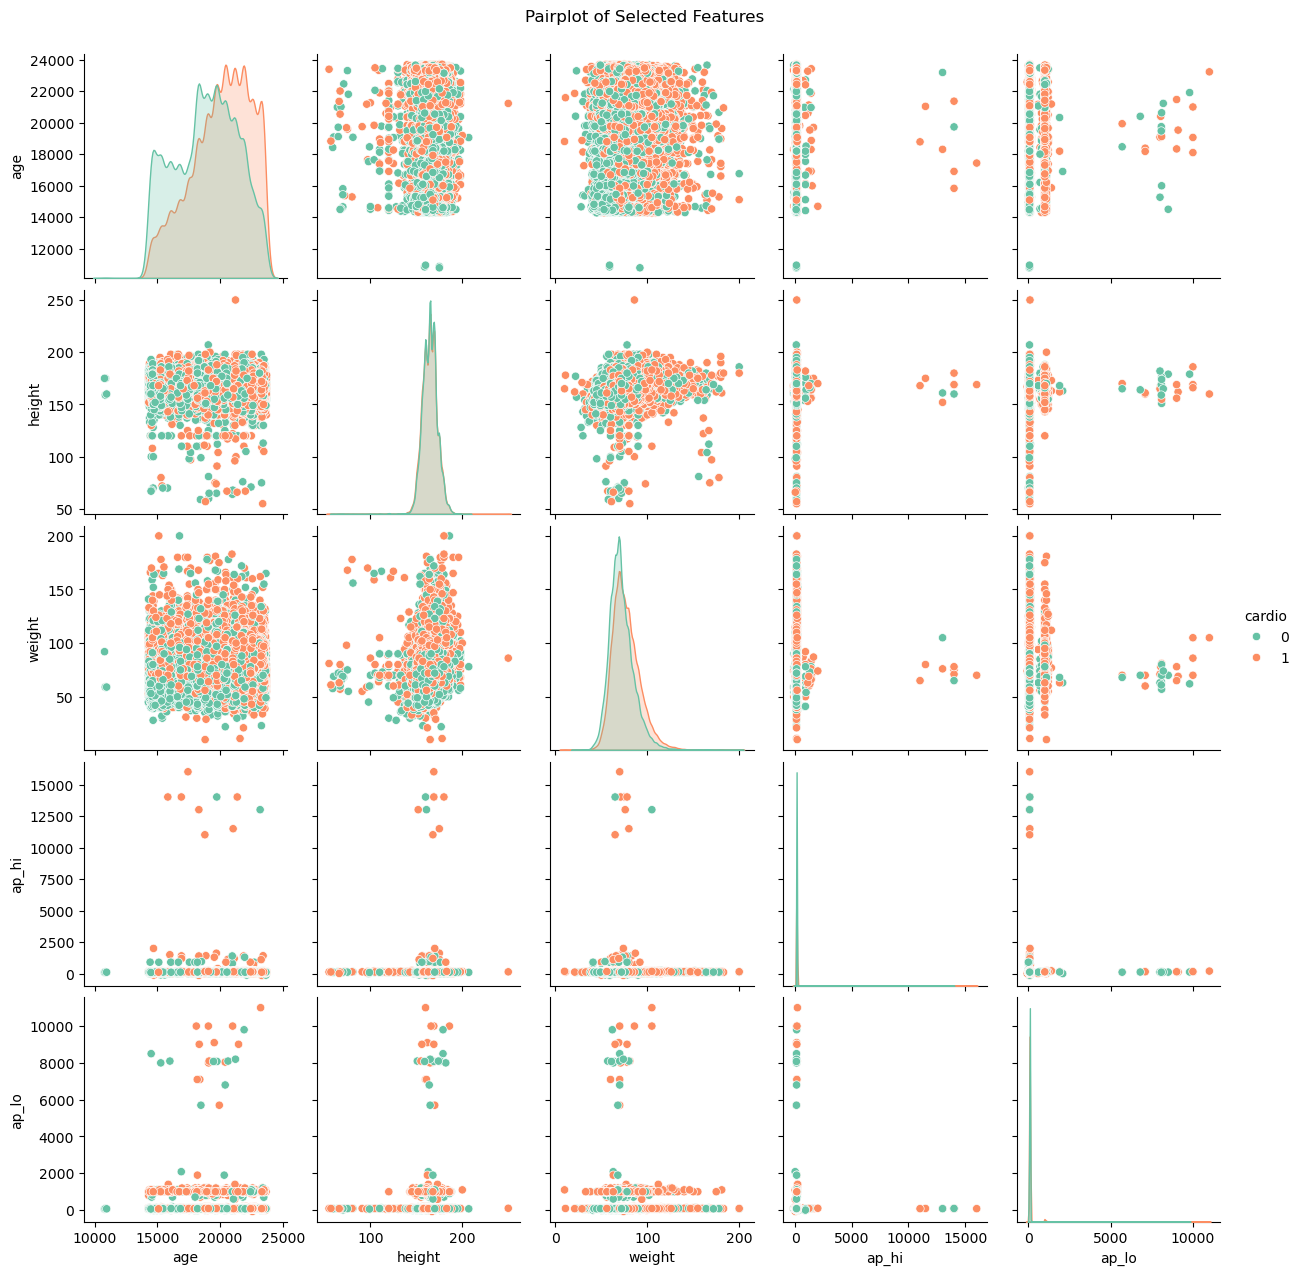

In [119]:
#Visualizes pairwise relationships between selected features.

subset_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio']
sns.pairplot(data[subset_features], hue='cardio', palette='Set2')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

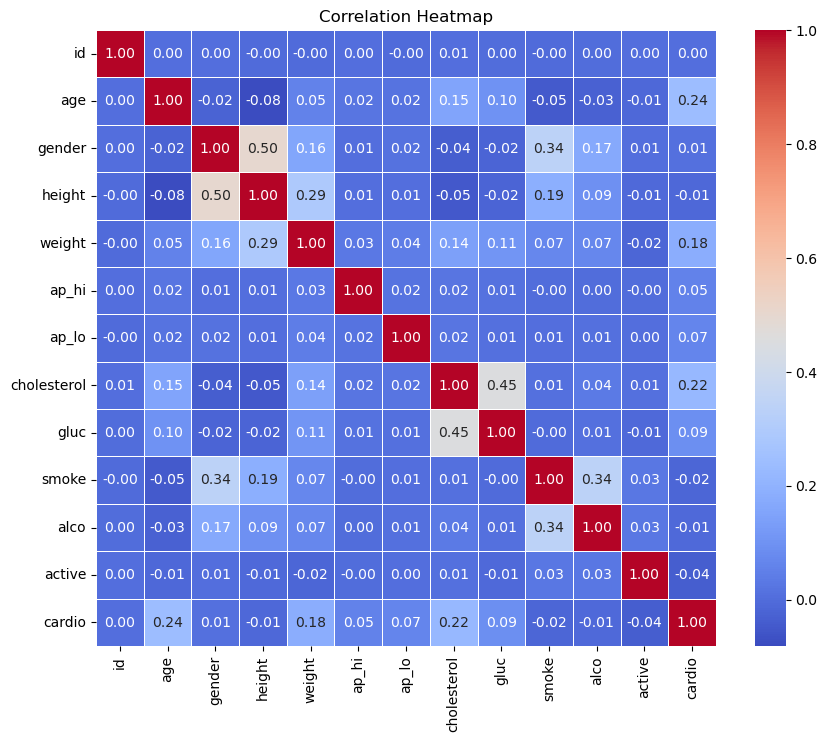

In [120]:
#Displays the correlation between all features in the dataset.

plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()